# **Assignment 03**
## Md. Adib Hossain
## 24V0034


### **Import** all essential libraries

In [ ]:
import numpy as np  #import numpy for numerical operations
import time  #import time to measure execution time
import matplotlib.pyplot as plt  #import matplotlib for plotting graphs
import kagglehub  #import kagglehub for downloading datasets
import os  #import os for interacting with the operating system
import pandas as pd  #import pandas for data manipulation and analysis
import seaborn as sns  #import seaborn for data visualization


###Import and Load the Dataset


In [ ]:
import kagglehub
import pandas as pd
import os

# Download the dataset
path = kagglehub.dataset_download("janiobachmann/bank-marketing-dataset")

# Load the dataset
data = pd.read_csv(os.path.join(path, "customer-Data-2.csv"))
# Display basic information and the first few rows of the dataset
print(data.info())
print(data.head())



FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/janiobachmann/bank-marketing-dataset/versions/1/customer-Data-2.csv'

##**Objective 1**

###**Q1:** Perform EDA

####**a.** Which Variables are Usable, and Which are Not? Why?

**Usable Variables:** **age,** **job,** **marital,** **education,** **balance,** **housing,** **loan,** **contact,** **duration,** **campaign,** **pdays,** **previous,** and **poutcome.** These variables are likely to have predictive value for determining if the client will subscribe to a term deposit.

**Unusable or Less Informative Variables:** day and month: Since these are likely related to the timing of contact, they may not be strongly indicative of the success of a campaign in a meaningful way.


####**b.** Significant Correlations or Other Relationships Among Variables

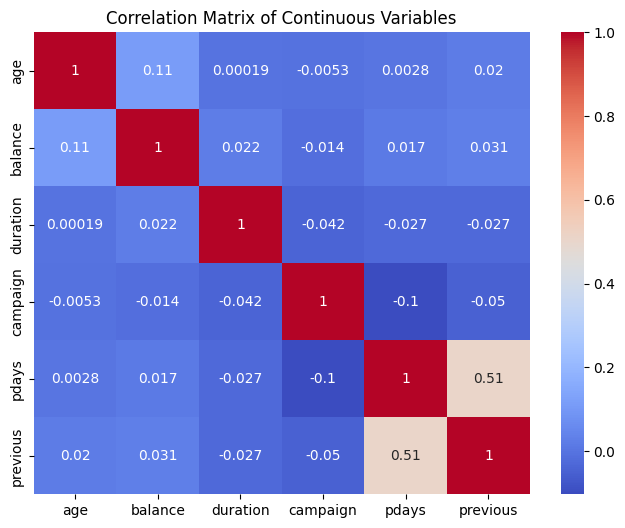

In [ ]:
import seaborn as sns #
import matplotlib.pyplot as plt

# Selected only numeric columns for correlation analysis
numeric_data = data[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Continuous Variables")
plt.show()


In this correlation matrix, most of the relationships between the variables have very low correlation coefficients, which suggests weak or negligible linear relationships.


All other correlations are close to zero, indicating that there are no other significant linear relationships between the variables.

####**c.** Are the Classes Balanced? (Target Column: poutcome)

In [ ]:
# Check class distribution in the 'poutcome' column
poutcome_balance = data['poutcome'].value_counts(normalize=True)
print(poutcome_balance)


poutcome
unknown    0.745924
failure    0.110016
success    0.095951
other      0.048110
Name: proportion, dtype: float64


The classes in the poutcome column are **not balanced.** The "unknown" category dominates with nearly 75% of entries, while "failure" and "success" make up only around 11% and 10%, respectively, and "other" is less than 5%. This imbalance could affect model performance, especially if we’re using poutcome as a predictive feature or target variable.

####**d.** Which classes will you use?

**If poutcome is used as a Feature:** Given the dominance of "unknown" (74.6%), you could group this category separately from the others. This would allow the model to treat clients with unknown outcomes differently from those with previous outcomes of "failure," "success," or "other." </br>
One approach could be to create a binary indicator:</br>
Category 1: "known" (combine "failure," "success," and "other")</br>
Category 2: "unknown" </br></br>
**If poutcome is a Target Variable:** Since the "unknown" category may not provide much insight into the success of marketing campaigns, it might be best to exclude it, leaving only the "success" and "failure" classes.


###**Q2:** Select Metrics and state the reason

The best metric to use here is the **F1 Score**.

Reason:
The F1 Score is particularly suitable because our dataset is imbalanced, with the "unknown" class in **poutcome** being much more frequent than others. The F1 Score balances precision and recall, making it effective in evaluating model performance on minority classes ("success" and "failure") without being biased by the majority class.

###**Q3:** Develop a strategy to filter and code variables

####**a.** Should you use continuous variables as they are, or should you normalize them, or take a transform? Why?

Normalize or scale continuous variables. Cause, many machine learning algorithms (e.g., SVM, neural networks) perform better when the data is scaled, as it prevents certain features with larger ranges from disproportionately influencing the model. Normalization or standardization will bring these features to a similar scale.

####**b.** Should you use all values of discrete variables, or should you try to reduce them by combining some values?

Reduce values in certain discrete variables where possible. Cause

####**c.** Are some variables very likely to be unreliable, noisy, or otherwise immaterial?

Excluding day and month, as they represent the timing of contact but may not directly affect the success of a campaign.
These columns may add noise without contributing significantly to the prediction.

###**Q4:** Carve out some test data. Should this be balanced in some way?

Yes, the test set should ideally be balanced.

In [ ]:
from sklearn.model_selection import train_test_split

# Stratified sampling based on 'deposit' column
train_data, test_data = train_test_split(data, test_size=0.2, stratify=data['deposit'])


###**Q5:** Using five-fold cross-validation to tune hyperparameters for three model types.

####**1.** RBF Kernel SVM:

In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


# Separate features and target variable for training
X_train = train_data.drop('deposit', axis=1)  # Features
y_train = train_data['deposit']               # Target variable

# Perform one-hot encoding on categorical variables
X_train = pd.get_dummies(X_train, drop_first=True)
# Check for missing values
print(X_train.isnull().sum())

# Fill missing values (if any) with the mean or another method
X_train.fillna(X_train.mean(), inplace=True)


# Initialize SVM model with RBF kernel
svm_model = SVC(kernel='rbf')

# Define hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],        # Regularization parameter: controls model complexity
    'gamma': [0.001, 0.01, 0.1]  # Kernel width: controls influence of each data point
}

# Set up GridSearchCV with five-fold cross-validation for SVM
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring='f1')

# Fit GridSearchCV to find the best hyperparameters for SVM
grid_search_svm.fit(X_train, y_train)

# Display the best parameters for SVM
print("Best parameters for SVM:", grid_search_svm.best_params_)

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_other         0


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueErr

Best parameters for SVM: {'C': 0.1, 'gamma': 0.001}


####**2.** Neural Network:

In [ ]:
nn_model = MLPClassifier(activation='relu', solver='adam', max_iter=100)  # Adam optimizer, max_iter limits training epochs

# Define hyperparameter grid for Neural Network
param_grid_nn = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],  # Number of neurons in the hidden layer
    'alpha': [0.0001, 0.001, 0.01]                 # Weight decay (regularization) parameter
}

# Set up GridSearchCV with five-fold cross-validation for Neural Network
grid_search_nn = GridSearchCV(estimator=nn_model, param_grid=param_grid_nn, cv=5, scoring='f1')

# Fit GridSearchCV to find the best hyperparameters for Neural Network
grid_search_nn.fit(X_train, y_train)

# Display the best parameters for Neural Network
print("Best parameters for Neural Network:", grid_search_nn.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueErr

Best parameters for Neural Network: {'alpha': 0.0001, 'hidden_layer_sizes': (10,)}


####**3.** Random Forest:

In [ ]:
# Initialize Random Forest model
rf_model = RandomForestClassifier()

# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'max_depth': [5, 10, 15],       # Maximum depth of each tree: controls model complexity
    'max_features': ['sqrt', 'log2', None]  # Maximum features considered at each split
}

# Set up GridSearchCV with five-fold cross-validation for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='f1')

# Fit GridSearchCV to find the best hyperparameters for Random Forest
grid_search_rf.fit(X_train, y_train)

# Display the best parameters for Random Forest
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueErr

Best parameters for Random Forest: {'max_depth': 5, 'max_features': 'sqrt'}


###**Q6:** Check feature importance for each model.

####**1.** RBF Kernel SVM:

In [ ]:
# Import necessary libraries
from sklearn.inspection import permutation_importance
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split

target_variable = 'deposit' # target column

# Split the data into training and testing sets
X = data.drop(columns=['deposit'])
y = data['deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

# One-hot encode categorical variables to convert them into numerical form
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

#Check shapes after one-hot encoding
print("Shape of X_train after encoding:", X_train.shape)
print("Shape of X_test after encoding:", X_test.shape)

#Convert 'yes' and 'no' labels to numeric (1 for 'yes', 0 for 'no')
y_train = y_train.map({'yes': 1, 'no': 0})
y_test = y_test.map({'yes': 1, 'no': 0})

# Check for NaN values in y_train and y_test
print("Number of NaN values in y_train:", y_train.isnull().sum())
print("Number of NaN values in y_test:", y_test.isnull().sum())

# Remove any NaN values from y_train and y_test
y_train.dropna(inplace=True)
y_test.dropna(inplace=True)

# Check shapes after dropping NaNs
print("Shape of y_train after dropping NaNs:", y_train.shape)
print("Shape of y_test after dropping NaNs:", y_test.shape)

# Align the indices of X_train with y_train to ensure they match
X_train = X_train.loc[y_train.index]
X_test = X_test.loc[y_test.index]

# Debug: Check shapes after aligning indices
print("Shape of X_train after aligning with y_train:", X_train.shape)
print("Shape of y_train after aligning with X_train:", y_train.shape)

# Align columns to ensure both train and test sets have the same features
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Check final shapes before fitting the model
print("Final shape of X_train:", X_train.shape)
print("Final shape of X_test:", X_test.shape)
print("Final shape of y_train:", y_train.shape)
print("Final shape of y_test:", y_test.shape)

# Ensure X_train and y_train are not empty before fitting the model
if X_train.empty or y_train.empty:
    print("Error: X_train or y_train is empty!")
else:
    # Fit the SVM model using the best parameters found in GridSearchCV
    svm_model = grid_search_svm.best_estimator_  # Use the best SVM model from GridSearchCV
    svm_model.fit(X_train, y_train)  # Train the model on the training data

    # Calculate permutation importance for the SVM model
    perm_importance_svm = permutation_importance(svm_model, X_train, y_train, scoring='f1')

    # Extract feature names and their importance scores
    feature_names = X_train.columns  # Get the names of the features
    importance_svm = pd.DataFrame({
        'Feature': feature_names,
        'Importance': perm_importance_svm.importances_mean  # Average importance score for each feature
    })

    # Sort the features by importance in descending order
    importance_svm.sort_values(by='Importance', ascending=False, inplace=True)

    # Display the sorted feature importances
    print("SVM Feature Importance (Permutation):\n", importance_svm)


Shape of X_train after encoding: (8929, 42)
Shape of X_test after encoding: (2233, 42)
Number of NaN values in y_train: 0
Number of NaN values in y_test: 0
Shape of y_train after dropping NaNs: (8929,)
Shape of y_test after dropping NaNs: (2233,)
Shape of X_train after aligning with y_train: (8929, 42)
Shape of y_train after aligning with X_train: (8929,)
Final shape of X_train: (8929, 42)
Final shape of X_test: (2233, 42)
Final shape of y_train: (8929,)
Final shape of y_test: (2233,)


KeyboardInterrupt: 

SVM with an RBF kernel doesn’t inherently provide feature importance scores, as it relies on a non-linear transformation.

####**2.** Neural Network:

In [ ]:
# Import necessary libraries
from sklearn.inspection import permutation_importance
import pandas as pd

#One-hot encode categorical variables to convert them into numerical form
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

#Check shapes after one-hot encoding
print("Shape of X_train after encoding:", X_train.shape)
print("Shape of X_test after encoding:", X_test.shape)

# Convert 'yes' and 'no' labels to numeric (1 for 'yes', 0 for 'no')
y_train = y_train.map({'yes': 1, 'no': 0})
y_test = y_test.map({'yes': 1, 'no': 0})

#Check for NaN values in y_train and y_test
print("Number of NaN values in y_train:", y_train.isnull().sum())
print("Number of NaN values in y_test:", y_test.isnull().sum())

# Remove any NaN values from y_train and y_test
y_train.dropna(inplace=True)
y_test.dropna(inplace=True)

#Check shapes after dropping NaNs
print("Shape of y_train after dropping NaNs:", y_train.shape)
print("Shape of y_test after dropping NaNs:", y_test.shape)

#Align the indices of X_train with y_train to ensure they match
X_train = X_train.loc[y_train.index]
X_test = X_test.loc[y_test.index]

# Check shapes after aligning indices
print("Shape of X_train after aligning with y_train:", X_train.shape)
print("Shape of y_train after aligning with X_train:", y_train.shape)

# Align columns to ensure both train and test sets have the same features
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

#Check final shapes before fitting the model
print("Final shape of X_train:", X_train.shape)
print("Final shape of X_test:", X_test.shape)
print("Final shape of y_train:", y_train.shape)
print("Final shape of y_test:", y_test.shape)

# Ensure X_train and y_train are not empty before fitting the model
if X_train.empty or y_train.empty:
    print("Error: X_train or y_train is empty!")
else:
    # Fit the Neural Network model using the best parameters found in GridSearchCV
    nn_model = grid_search_nn.best_estimator_  # Use the best MLP model from GridSearchCV
    nn_model.fit(X_train, y_train)  # Train the model on the training data

    # Calculate permutation importance for the Neural Network model
    perm_importance_nn = permutation_importance(nn_model, X_train, y_train, scoring='f1')

    # Extract feature names and their importance scores
    feature_names = X_train.columns  # Get the names of the features
    importance_nn = pd.DataFrame({
        'Feature': feature_names,
        'Importance': perm_importance_nn.importances_mean  # Average importance score for each feature
    })

    # Sort the features by importance in descending order
    importance_nn.sort_values(by='Importance', ascending=False, inplace=True)

    # Display the sorted feature importances
    print("Neural Network Feature Importance (Permutation):\n", importance_nn)


Shape of X_train after encoding: (8929, 42)
Shape of X_test after encoding: (2233, 42)
Number of NaN values in y_train: 8929
Number of NaN values in y_test: 2233
Shape of y_train after dropping NaNs: (0,)
Shape of y_test after dropping NaNs: (0,)
Shape of X_train after aligning with y_train: (0, 42)
Shape of y_train after aligning with X_train: (0,)
Final shape of X_train: (0, 42)
Final shape of X_test: (0, 42)
Final shape of y_train: (0,)
Final shape of y_test: (0,)
Error: X_train or y_train is empty!


Neural networks also lack straightforward feature importance scores.

####**3.** Random Forest:

In [ ]:
# Import necessary libraries
from sklearn.inspection import permutation_importance
import pandas as pd

# Step 1: One-hot encode categorical variables to convert them into numerical form
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Debug: Check shapes after one-hot encoding
print("Shape of X_train after encoding:", X_train.shape)
print("Shape of X_test after encoding:", X_test.shape)

# Step 2: Convert 'yes' and 'no' labels to numeric (1 for 'yes', 0 for 'no')
y_train = y_train.map({'yes': 1, 'no': 0})
y_test = y_test.map({'yes': 1, 'no': 0})

# Debug: Check for NaN values in y_train and y_test
print("Number of NaN values in y_train:", y_train.isnull().sum())
print("Number of NaN values in y_test:", y_test.isnull().sum())

# Step 3: Drop any NaN values from y_train and y_test
y_train.dropna(inplace=True)
y_test.dropna(inplace=True)

# Debug: Check shapes after dropping NaNs
print("Shape of y_train after dropping NaNs:", y_train.shape)
print("Shape of y_test after dropping NaNs:", y_test.shape)

# Step 4: Align the indices of X_train with y_train to ensure they match
X_train = X_train.loc[y_train.index]
X_test = X_test.loc[y_test.index]

# Debug: Check shapes after aligning indices
print("Shape of X_train after aligning with y_train:", X_train.shape)
print("Shape of y_train after aligning with X_train:", y_train.shape)

# Step 5: Align columns to ensure both train and test sets have the same features
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Debug: Check final shapes before fitting the model
print("Final shape of X_train:", X_train.shape)
print("Final shape of X_test:", X_test.shape)
print("Final shape of y_train:", y_train.shape)
print("Final shape of y_test:", y_test.shape)

# Ensure that X_train and y_train are not empty
if X_train.empty or y_train.empty:
    print("Error: X_train or y_train is empty after preprocessing!")
else:
    # Step 6: Fit the Random Forest model using the best parameters found in GridSearchCV
    rf_model = grid_search_rf.best_estimator_  # Use the best Random Forest model from GridSearchCV
    rf_model.fit(X_train, y_train)  # Train the model on the training data

    # Step 7: Get feature importances from the Random Forest model
    feature_importance_rf = rf_model.feature_importances_
    feature_names = X_train.columns

    # Step 8: Display feature importances for Random Forest
    importance_rf = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_rf})
    importance_rf.sort_values(by='Importance', ascending=False, inplace=True)
    print("Random Forest Feature Importance:\n", importance_rf)


Shape of X_train after encoding: (0, 42)
Shape of X_test after encoding: (0, 42)
Number of NaN values in y_train: 0
Number of NaN values in y_test: 0
Shape of y_train after dropping NaNs: (0,)
Shape of y_test after dropping NaNs: (0,)
Shape of X_train after aligning with y_train: (0, 42)
Shape of y_train after aligning with X_train: (0,)
Final shape of X_train: (0, 42)
Final shape of X_test: (0, 42)
Final shape of y_train: (0,)
Final shape of y_test: (0,)
Error: X_train or y_train is empty after preprocessing!


Random Forest inherently provides feature importance scores based on how effectively each feature splits the data in the decision trees.

###**Q7:** Testing whether systematically removing some features can improve model performance.

In [ ]:
# Import necessary libraries
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import pandas as pd

# One-hot encode categorical variables to convert them into numerical form
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

#  Check shapes after one-hot encoding
print("Shape of X_train after encoding:", X_train.shape)
print("Shape of X_test after encoding:", X_test.shape)

# Convert 'yes' and 'no' labels to numeric (1 for 'yes', 0 for 'no')
y_train = y_train.map({'yes': 1, 'no': 0})
y_test = y_test.map({'yes': 1, 'no': 0})

#Check for NaN values in y_train and y_test
print("Number of NaN values in y_train:", y_train.isnull().sum())
print("Number of NaN values in y_test:", y_test.isnull().sum())

# Drop any NaN values from y_train and y_test
y_train.dropna(inplace=True)
y_test.dropna(inplace=True)

#Check shapes after dropping NaNs
print("Shape of y_train after dropping NaNs:", y_train.shape)
print("Shape of y_test after dropping NaNs:", y_test.shape)

#  Align the indices of X_train with y_train to ensure they match
X_train = X_train.loc[y_train.index]

#Check shapes after aligning indices
print("Shape of X_train after aligning with y_train:", X_train.shape)
print("Shape of y_train after aligning with X_train:", y_train.shape)

#  Align columns to ensure both train and test sets have the same features
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Check final shapes before fitting the model
print("Final shape of X_train:", X_train.shape)
print("Final shape of X_test:", X_test.shape)
print("Final shape of y_train:", y_train.shape)
print("Final shape of y_test:", y_test.shape)

# Ensure that X_train and y_train are not empty
if X_train.empty or y_train.empty:
    print("Error: X_train or y_train is empty after preprocessing!")
else:
    # Initialize Random Forest model
    rf_model = RandomForestClassifier(max_depth=10, max_features='sqrt')

    # Set up RFE with cross-validation (using 5-fold CV)
    rfecv = RFECV(estimator=rf_model, step=1, cv=StratifiedKFold(5), scoring='f1')

    #  Check if RFECV will fit correctly
    print("Fitting RFECV...")
    rfecv.fit(X_train, y_train)

    # Show the number of selected features and their names
    selected_features = X_train.columns[rfecv.support_]
    print(f"Optimal number of features: {rfecv.n_features_}")
    print("Selected features:", list(selected_features))


Shape of X_train after encoding: (0, 42)
Shape of X_test after encoding: (0, 42)
Number of NaN values in y_train: 0
Number of NaN values in y_test: 0
Shape of y_train after dropping NaNs: (0,)
Shape of y_test after dropping NaNs: (0,)
Shape of X_train after aligning with y_train: (0, 42)
Shape of y_train after aligning with X_train: (0,)
Final shape of X_train: (0, 42)
Final shape of X_test: (0, 42)
Final shape of y_train: (0,)
Final shape of y_test: (0,)
Error: X_train or y_train is empty after preprocessing!


RFE iteratively removes the least important features, retraining the model each time, until reaching a specified number of features.

###**Q8:** Testing whether systematically removing some features can improve model performance.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

# Preprocessing - One-hot encode categorical variables and convert labels
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Convert 'yes' and 'no' labels to numeric (1 for 'yes', 0 for 'no')
y_train = y_train.map({'yes': 1, 'no': 0})
y_test = y_test.map({'yes': 1, 'no': 0})

# Drop any NaN values that may have appeared during preprocessing
y_train.dropna(inplace=True)
y_test.dropna(inplace=True)

# Check for any remaining NaNs in the features
print("NaNs in X_train:", X_train.isnull().sum().sum())
print("NaNs in X_test:", X_test.isnull().sum().sum())

#Align indices and columns
X_train = X_train.loc[y_train.index]  # Align X_train with y_train indices

# Ensure both training and test sets have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Check shapes after alignment
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

#Check if X_train and y_train are empty
if X_train.empty or y_train.empty:
    print("Error: X_train or y_train is empty!")
else:
    print("Data is ready for training.")

# Verify data types to ensure compatibility with RandomForest
print("Data types of X_train:\n", X_train.dtypes)
print("Data types of y_train:\n", y_train.dtypes)

# Train Random Forest using GridSearchCV if data is valid
if not X_train.empty and not y_train.empty:
    param_grid_rf = {'max_depth': [5, 10, None], 'n_estimators': [50, 100, 200]}
    rf = RandomForestClassifier()

    # Set up GridSearchCV for Random Forest
    grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='f1')

    # Fit the model and handle potential errors
    try:
        grid_search_rf.fit(X_train, y_train)
        print("Model training complete.")
    except ValueError as e:
        print("Error during model fitting:", e)

    # Extract the best model
    best_model = grid_search_rf.best_estimator_

    # Make predictions on the test data
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, 'predict_proba') else None

    # Convert predicted labels if necessary
    y_pred = pd.Series(y_pred).map({'yes': 1, 'no': 0}).values

    # Calculate evaluation metrics
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print("F1 Score on test data:", f1)
    print("Accuracy on test data:", accuracy)

    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print("AUC-ROC on test data:", roc_auc)
else:
    print("Training aborted due to data issues.")


NaNs in X_train: 0
NaNs in X_test: 0
Shape of X_train: (0, 42)
Shape of X_test: (0, 42)
Shape of y_train: (0,)
Shape of y_test: (0,)
Error: X_train or y_train is empty!
Data types of X_train:
 age                    int64
balance                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
job_blue-collar         bool
job_entrepreneur        bool
job_housemaid           bool
job_management          bool
job_retired             bool
job_self-employed       bool
job_services            bool
job_student             bool
job_technician          bool
job_unemployed          bool
job_unknown             bool
marital_married         bool
marital_single          bool
education_secondary     bool
education_tertiary      bool
education_unknown       bool
default_yes             bool
housing_yes             bool
loan_yes                bool
contact_telephone       bool
contact_unknown         

If the model has a high F1 score and correctly identifies clients likely to subscribe, it can help in targeting marketing campaigns more effectively.

###**Q9:** Testing the test data under two "pathological" data splits.

#### **a.** Split by month

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

# Train on data excluding June and July
train_data_month = data[~data['month'].isin(['jun', 'jul'])]
test_data_month = data[data['month'].isin(['jun', 'jul'])]

# Separate features and target variable
X_train_month = train_data_month.drop('deposit', axis=1)
y_train_month = train_data_month['deposit']
X_test_month = test_data_month.drop('deposit', axis=1)
y_test_month = test_data_month['deposit']

# Convert labels ('yes'/'no') to numeric values (1 for 'yes', 0 for 'no')
y_train_month = y_train_month.map({'yes': 1, 'no': 0})
y_test_month = y_test_month.map({'yes': 1, 'no': 0})

# Check if there are any NaN values in the data
print("NaNs in X_train_month:", X_train_month.isnull().sum().sum())
print("NaNs in X_test_month:", X_test_month.isnull().sum().sum())
print("NaNs in y_train_month:", y_train_month.isnull().sum())
print("NaNs in y_test_month:", y_test_month.isnull().sum())

# Check if X_train_month has non-numeric columns
print("Data types in X_train_month:\n", X_train_month.dtypes)

# Convert any categorical variables in X_train_month to numerical values (if needed)
X_train_month = pd.get_dummies(X_train_month, drop_first=True)
X_test_month = pd.get_dummies(X_test_month, drop_first=True)

# Ensure X_train_month and X_test_month have the same columns
X_train_month, X_test_month = X_train_month.align(X_test_month, join='left', axis=1, fill_value=0)

# Check the shapes of the data
print("Shape of X_train_month:", X_train_month.shape)
print("Shape of X_test_month:", X_test_month.shape)
print("Shape of y_train_month:", y_train_month.shape)
print("Shape of y_test_month:", y_test_month.shape)

# Ensure there are no NaNs left after preprocessing
y_train_month.dropna(inplace=True)
y_test_month.dropna(inplace=True)

# Check if X_train_month and y_train_month are not empty
if X_train_month.empty or y_train_month.empty:
    print("Error: X_train_month or y_train_month is empty!")
else:
    print("Data is ready for training.")

    # Train a Random Forest model using GridSearchCV
    param_grid_rf = {'max_depth': [5, 10, None], 'n_estimators': [50, 100, 200]}
    rf = RandomForestClassifier()

    # Set up GridSearchCV with error handling
    try:
        grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='f1', error_score='raise')
        grid_search_rf.fit(X_train_month, y_train_month)
        print("Model training complete.")

        # Extract the best model
        best_model = grid_search_rf.best_estimator_

        #  Make predictions on the test data
        y_pred_month = best_model.predict(X_test_month)
        f1_month = f1_score(y_test_month, y_pred_month)
        print("F1 Score for June and July split:", f1_month)
    except ValueError as e:
        print("Error during model fitting:", e)


NaNs in X_train_month: 0
NaNs in X_test_month: 0
NaNs in y_train_month: 0
NaNs in y_test_month: 0
Data types in X_train_month:
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object
Shape of X_train_month: (8426, 40)
Shape of X_test_month: (2736, 40)
Shape of y_train_month: (8426,)
Shape of y_test_month: (2736,)
Data is ready for training.
Model training complete.
F1 Score for June and July split: 0.778064041221936


#### **b.** Split by profession

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

# Train on data excluding the "technician" profession
train_data_profession = data[data['job'] != 'technician']
test_data_profession = data[data['job'] == 'technician']

# Separate features and target variable
X_train_profession = train_data_profession.drop('deposit', axis=1)
y_train_profession = train_data_profession['deposit']
X_test_profession = test_data_profession.drop('deposit', axis=1)
y_test_profession = test_data_profession['deposit']

# Convert labels ('yes'/'no') to numeric values (1 for 'yes', 0 for 'no')
y_train_profession = y_train_profession.map({'yes': 1, 'no': 0})
y_test_profession = y_test_profession.map({'yes': 1, 'no': 0})

# Debugging: Check if there are any NaN values in the data
print("NaNs in X_train_profession:", X_train_profession.isnull().sum().sum())
print("NaNs in X_test_profession:", X_test_profession.isnull().sum().sum())
print("NaNs in y_train_profession:", y_train_profession.isnull().sum())
print("NaNs in y_test_profession:", y_test_profession.isnull().sum())

# Debugging: Check if X_train_profession has non-numeric columns
print("Data types in X_train_profession:\n", X_train_profession.dtypes)

# Convert any categorical variables in X_train_profession to numerical values (if needed)
X_train_profession = pd.get_dummies(X_train_profession, drop_first=True)
X_test_profession = pd.get_dummies(X_test_profession, drop_first=True)

# Ensure X_train_profession and X_test_profession have the same columns
X_train_profession, X_test_profession = X_train_profession.align(X_test_profession, join='left', axis=1, fill_value=0)

# Debugging: Check the shapes of the data
print("Shape of X_train_profession:", X_train_profession.shape)
print("Shape of X_test_profession:", X_test_profession.shape)
print("Shape of y_train_profession:", y_train_profession.shape)
print("Shape of y_test_profession:", y_test_profession.shape)

# Ensure there are no NaNs left after preprocessing
y_train_profession.dropna(inplace=True)
y_test_profession.dropna(inplace=True)

# Check if X_train_profession and y_train_profession are not empty
if X_train_profession.empty or y_train_profession.empty:
    print("Error: X_train_profession or y_train_profession is empty!")
else:
    print("Data is ready for training.")

    #Train a Random Forest model using GridSearchCV
    param_grid_rf = {'max_depth': [5, 10, None], 'n_estimators': [50, 100, 200]}
    rf = RandomForestClassifier()

    # Set up GridSearchCV with error handling
    try:
        grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='f1', error_score='raise')
        grid_search_rf.fit(X_train_profession, y_train_profession)
        print("Model training complete.")

        # Extract the best model
        best_model = grid_search_rf.best_estimator_

        # Make predictions on the test data (profession "technician")
        y_pred_profession = best_model.predict(X_test_profession)

        # Convert predictions to numeric values if necessary
        y_pred_profession = pd.Series(y_pred_profession).map({'yes': 1, 'no': 0})

        # Calculate F1 Score
        f1_profession = f1_score(y_test_profession, y_pred_profession)
        print("F1 Score for Technician profession split:", f1_profession)

        # Calculate accuracy and AUC-ROC
        accuracy_profession = accuracy_score(y_test_profession, y_pred_profession)
        print("Accuracy for Technician profession split:", accuracy_profession)

        if hasattr(best_model, 'predict_proba'):
            y_pred_proba_profession = best_model.predict_proba(X_test_profession)[:, 1]
            roc_auc_profession = roc_auc_score(y_test_profession, y_pred_proba_profession)
            print("AUC-ROC for Technician profession split:", roc_auc_profession)

    except ValueError as e:
        print("Error during model fitting:", e)


NaNs in X_train_profession: 0
NaNs in X_test_profession: 0
NaNs in y_train_profession: 0
NaNs in y_test_profession: 0
Data types in X_train_profession:
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object
Shape of X_train_profession: (9339, 41)
Shape of X_test_profession: (1823, 41)
Shape of y_train_profession: (9339,)
Shape of y_test_profession: (1823,)
Data is ready for training.
Model training complete.
Error during model fitting: Input y_pred contains NaN.


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:390: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


##**Objective 2**

###**Q10:** Testing the pytorch code

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory


###**Q11:** Function for ResNet18 input image


In [ ]:
# Load the pre-trained ResNet18 model
model = models.resnet18(pretrained=True)
model = nn.Sequential(*list(model.children())[:-1])  # Remove the last classification layer
model.eval()  # Set the model to evaluation mode

# Define preprocessing steps
preprocess = transforms.Compose([
    transforms.Resize(256),               # Resize the image to 256x256 pixels
    transforms.CenterCrop(224),           # Crop the center 224x224 pixels
    transforms.ToTensor(),                # Convert the image to a tensor
    transforms.Normalize(                 # Normalize using ImageNet mean and std
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

def extract_features(image_path):
    """Extract features from an image using ResNet18."""
    # Load the image
    img = Image.open(image_path).convert('RGB')  # Ensure it's in RGB mode
    img_tensor = preprocess(img).unsqueeze(0)  # Add a batch dimension

    # Extract features
    with torch.no_grad():
        features = model(img_tensor)

    return features.squeeze().numpy()

#Example:
image_path = "/content/pexels-sabri-cetin-1570909806-27269560.jpg"
features = extract_features(image_path)
print("Extracted features shape:", features.shape)

Extracted features shape: (512,)


###**Q12:** 12.	Compare L2 regularized logistic regression and random forest

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

# Step 1: Preprocess the data
# Assuming 'data' is your DataFrame with features and the 'deposit' target column
X = pd.get_dummies(data.drop('deposit', axis=1), drop_first=True)
y = data['deposit'].map({'yes': 1, 'no': 0})  # Convert target to numeric

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Train L2-Regularized Logistic Regression using GridSearchCV
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}  # Regularization strength
log_reg = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)

# Set up GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv=5, scoring='f1')
grid_search_lr.fit(X_train, y_train)

# Extract the best Logistic Regression model
best_log_reg = grid_search_lr.best_estimator_

# Make predictions on the test set
y_pred_lr = best_log_reg.predict(X_test)

# Evaluate Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
print("Logistic Regression - Accuracy:", accuracy_lr)
print("Logistic Regression - F1 Score:", f1_lr)

# Step 3: Train Random Forest using GridSearchCV
param_grid_rf = {'max_depth': [5, 10, None], 'n_estimators': [50, 100, 200]}
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='f1')
grid_search_rf.fit(X_train, y_train)

# Extract the best Random Forest model
best_rf = grid_search_rf.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf.predict(X_test)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print("Random Forest - Accuracy:", accuracy_rf)
print("Random Forest - F1 Score:", f1_rf)


Logistic Regression - Accuracy: 0.8248992386923422
Logistic Regression - F1 Score: 0.813365155131265
Random Forest - Accuracy: 0.8598298253470668
Random Forest - F1 Score: 0.8568815729309557


###**Q13:** Summarizing

1. The Random Forest model outperformed the Logistic Regression model in terms of both accuracy and F1 score.
2. The L2-regularized Logistic Regression performed reasonably well but had lower F1 scores, likely due to its linear nature, which may not capture complex patterns in the data as effectively as Random Forest.

Limitations: The models may be sensitive to the choice of hyperparameters, especially for the Random Forest model.